In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('results/lang_detected.csv')

In [4]:
df.shape

(122804, 6)

In [5]:
import re
import string
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    if not isinstance(text, str):  # Handle non-string entries gracefully
        return ""
    
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join back into string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply text cleaning
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)

# Remove rows with fewer than 3 words
df = df[df['cleaned_text'].apply(lambda x: len(x.split()) >= 3)]

# Reset index
df.reset_index(drop=True, inplace=True)

df


[nltk_data] Downloading package stopwords to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviewId,comment,score,date,cleaned_text,english
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,fornikite with no colombus wind daphnee,5,2025-01-03 15:21:55,fornikite colombus wind daphnee,True
1,8255ef9d-52ab-4981-ad59-ff869650f60e,Adds popping up during movies,1,2025-01-03 15:16:01,add popping movie,True
2,6e26402d-b74f-41df-b9a4-7a92a6a76271,App will not open on Amazon Fire Tablet. I can...,1,2025-01-03 15:10:25,app open amazon fire tablet click profile app ...,True
3,dfe9f50c-5a61-4a40-a32a-8a3e5729f660,I haven't been able to use Netflix on my Googl...,1,2025-01-03 14:54:07,havent able use netflix google pixel pro since...,True
4,f748736b-3628-4fb4-87d0-a9300d532ba7,"Netflix is my favourite streaming platform, ma...",5,2025-01-03 14:49:23,netflix favourite streaming platform mainly fo...,True
...,...,...,...,...,...,...
116372,a760ead9-e7aa-4ed1-a651-5c37c3600dac,i really like it! there are so many movies and...,5,2019-08-03 15:06:03,really like many movie kdramas watch,True
116373,4957f9e7-d7f4-4a52-9764-031cebcac83f,I love Netflix. I always enjoy my time using it.,5,2022-08-15 16:16:30,love netflix always enjoy time using,True
116374,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Sound quality is very slow of movies,1,2020-08-17 07:26:58,sound quality slow movie,True
116375,32870f7f-c461-4256-b602-75244ca60248,Rate is very expensive.. bcos we see netflix s...,1,2019-07-21 09:41:42,rate expensive bcos see netflix sunday charged...,True


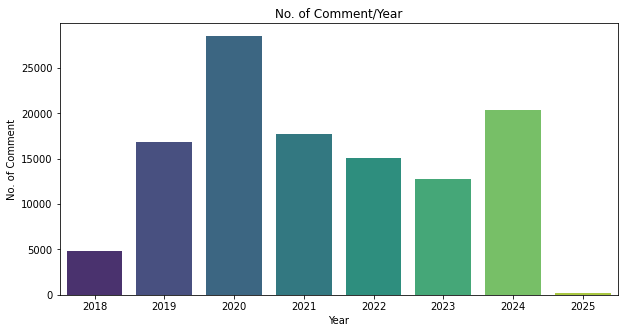

In [9]:
# data visulaization for the no. of content each year
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10,5))
sns.countplot(x=df['date'].dt.year, palette='viridis')
plt.title('No. of Comment/Year')
plt.xlabel('Year')
plt.ylabel('No. of Comment')
plt.show()


In [10]:
df['date'].dt.year.value_counts()

date
2020    28540
2024    20389
2021    17711
2019    16869
2022    15093
2023    12763
2018     4800
2025      212
Name: count, dtype: int64

In [11]:
df_2018 = df[df['date'].dt.year == 2018]

In [17]:
from sklearn.model_selection import train_test_split

X = df_2018
X_train, X_test = train_test_split(X, test_size=0.75, random_state=42)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')

X_train shape: (1200, 6), X_test shape: (3600, 6)


In [18]:
X_train.to_csv('comment_classification_train.csv', index=False)

In [19]:
X_test.to_csv('comment_classification_test.csv', index=False)